In [1]:
# importing the Librarys
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataframe
loan_df = pd.read_csv("Desktop/loan.csv", encoding = "ISO-8859-1", low_memory=False)
loan_df.shape

(39717, 111)

In [4]:
# Data Cleaning and Manipulation

In [5]:
# Dropping null values
loan_df=loan_df.dropna(axis=1,how='all')
loan_df.shape

(39717, 57)

In [6]:
# removing colums with unique values
loan_df= loan_df.loc[:,loan_df.nunique()!=1]
loan_df.shape

(39717, 48)

In [7]:
# sum of all null values
loan_df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [8]:
# Dropping cloumns with more than 50% null values
loan_df=loan_df.loc[:,round(loan_df.isnull().sum()/len(loan_df)*100,2)<50]
loan_df.shape

(39717, 45)

In [56]:
loan_df.isnull().sum()

loan_amnt               0   
funded_amnt             0   
funded_amnt_inv         0   
term                    0   
int_rate                0   
installment             0   
grade                   0   
sub_grade               0   
emp_length              1026
home_ownership          0   
annual_inc              0   
verification_status     0   
issue_d                 0   
loan_status             0   
purpose                 0   
zip_code                0   
addr_state              0   
dti                     0   
delinq_2yrs             0   
open_acc                0   
pub_rec                 0   
revol_bal               0   
revol_util              0   
total_acc               0   
out_prncp               0   
out_prncp_inv           0   
total_pymnt             0   
total_pymnt_inv         0   
total_rec_prncp         0   
total_rec_int           0   
total_rec_late_fee      0   
recoveries              0   
last_pymnt_amnt         0   
pub_rec_bankruptcies    0   
loan_income_ra

In [9]:
# Loading data dictionary file and takeing the Loan column descriptions

In [10]:
# Creating data frame for dictionary
data_dic = pd.read_excel("Desktop/Data_Dictionary.xlsx")

In [11]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
data_dic[data_dic['LoanStatNew'].isin(list(loan_df))]

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan application
4,annual_inc,The self-reported annual income provided by the borrower during registration.
11,collection_recovery_fee,post charge off collection fee
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
15,desc,Loan description provided by the borrower
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
18,earliest_cr_line,The month the borrower's earliest reported credit line was opened
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
20,emp_title,The job title supplied by the Borrower when applying for the loan.*
23,funded_amnt,The total amount committed to that loan at that point in time.


In [12]:
drop_columns=['id','member_id', 'emp_title', 'url', 'desc','title', 'earliest_cr_line',
              'last_pymnt_d','last_credit_pull_d','collection_recovery_fee', 'inq_last_6mths']
loan_df=loan_df.drop(drop_columns,axis=1)
loan_df.dtypes

loan_amnt               int64  
funded_amnt             int64  
funded_amnt_inv         float64
term                    object 
int_rate                object 
installment             float64
grade                   object 
sub_grade               object 
emp_length              object 
home_ownership          object 
annual_inc              float64
verification_status     object 
issue_d                 object 
loan_status             object 
purpose                 object 
zip_code                object 
addr_state              object 
dti                     float64
delinq_2yrs             int64  
open_acc                int64  
pub_rec                 int64  
revol_bal               int64  
revol_util              object 
total_acc               int64  
out_prncp               float64
out_prncp_inv           float64
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
total_rec_int           float64
total_rec_late_fee      float64
recoveri

In [13]:
# Converting revol_util and int_rate into a numeric type
loan_df.revol_util=loan_df.revol_util.str.rstrip('%').astype('float')
loan_df.int_rate=loan_df.int_rate.str.rstrip('%').astype('float')

# Converting zip code to numbric by removing the X coded for braveity
loan_df['zip_code'] = loan_df['zip_code'].apply(lambda s: int(s[:-2]))
loan_df["pub_rec_bankruptcies"].fillna(0.0, inplace=True)
loan_df["revol_util"].fillna(0.0, inplace=True)
loan_df.dtypes

loan_amnt               int64  
funded_amnt             int64  
funded_amnt_inv         float64
term                    object 
int_rate                float64
installment             float64
grade                   object 
sub_grade               object 
emp_length              object 
home_ownership          object 
annual_inc              float64
verification_status     object 
issue_d                 object 
loan_status             object 
purpose                 object 
zip_code                int64  
addr_state              object 
dti                     float64
delinq_2yrs             int64  
open_acc                int64  
pub_rec                 int64  
revol_bal               int64  
revol_util              float64
total_acc               int64  
out_prncp               float64
out_prncp_inv           float64
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
total_rec_int           float64
total_rec_late_fee      float64
recoveri

In [14]:
data_dic[data_dic['LoanStatNew'].isin(list(loan_df))]

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan application
4,annual_inc,The self-reported annual income provided by the borrower during registration.
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
23,funded_amnt,The total amount committed to that loan at that point in time.
24,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
25,grade,LC assigned loan grade
26,home_ownership,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."
33,installment,The monthly payment owed by the borrower if the loan originates.


In [15]:
# Derived Metrics

In [16]:
# 1. Loan amount to Annual Income ratio
loan_df['loan_income_ratio']= loan_df['loan_amnt']/loan_df['annual_inc']

In [17]:
# 2. Extract Year & Month from Issue date
loan_df['issue_month'],loan_df['issue_year'] = loan_df['issue_d'].str.split('-', 1).str
loan_df[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
3,Dec-11,Dec,11
4,Dec-11,Dec,11


In [18]:
# 3. Change order of months from Jan to Dec, currently it's in alphabetical order(A-Z)
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan_df['issue_month'] = pd.Categorical(loan_df['issue_month'],categories=months_order, ordered=True)

In [19]:
# 4. Create Bins for range of Loan Amount
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan_df['loan_amnt_range'] = pd.cut(loan_df['loan_amnt'], bins, labels=slot)

In [20]:
# 5. Create Bins for range of Interest rates
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan_df['int_rate_range'] = pd.cut(loan_df['int_rate'], bins, labels=slot)

In [21]:
# 6. Create Bins for range of annual_inc
bins = [0, 20000, 40000, 60000, 80000, 100000,1200000]
slot = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000','100000 and above']
loan_df['annual_inc_range'] = pd.cut(loan_df['annual_inc'], bins, labels=slot)

In [22]:
# Univariate Analysis

In [23]:
def univariate(df,col,vartype,hue =None):
    
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

In [24]:
# Continuous Variables

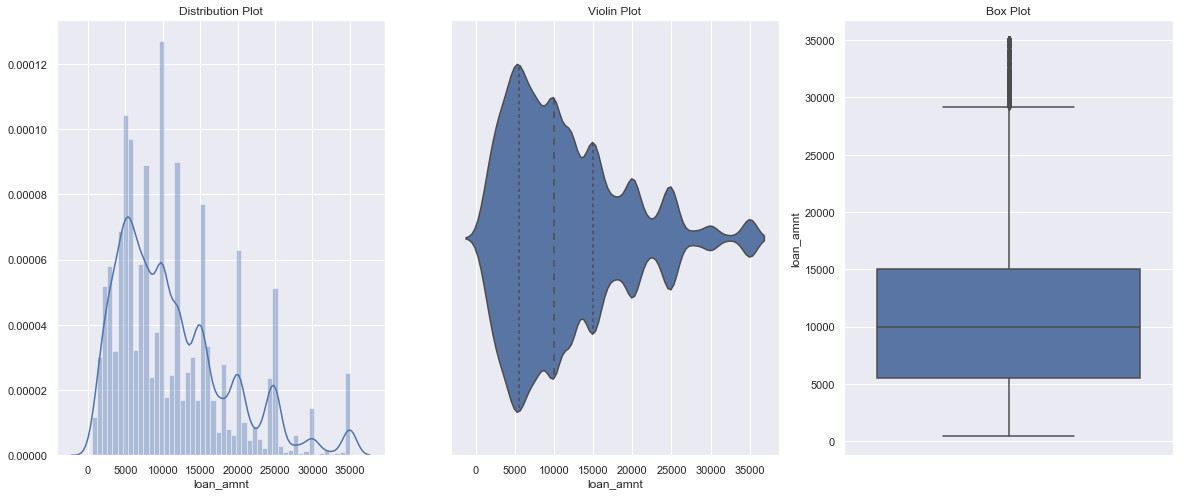

In [25]:
# 1. Loan_amount
univariate(df=loan_df,col='loan_amnt',vartype=0)

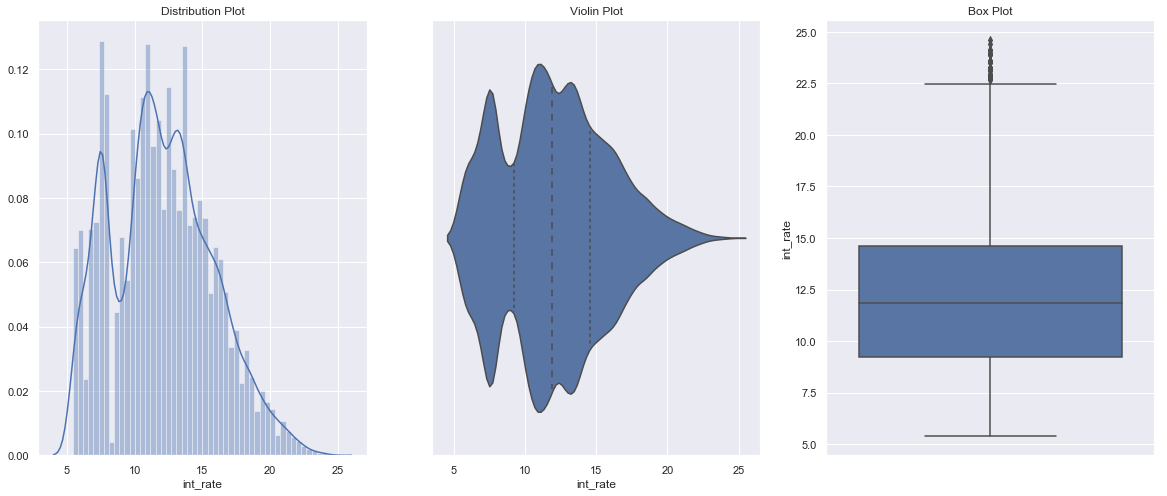

In [27]:
# 2. Interest Rate

univariate(df=loan_df,col='int_rate',vartype=0)

In [28]:
# 3.Annual income
loan_df["annual_inc"].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [29]:
# Max value is 6000000 which is approx 86 times more than mean value, so we will remove the outliers from Annual Income.
# Remove Outliers (values from 75 to 100%)
q = loan_df["annual_inc"].quantile(0.864)
loan_df = loan_df[loan_df["annual_inc"] < q]
loan_df["annual_inc"].describe()

count    34276.000000 
mean     55180.007270 
std      21528.089956 
min      4000.000000  
25%      38766.840000 
50%      53000.000000 
75%      70001.750000 
max      102996.000000
Name: annual_inc, dtype: float64

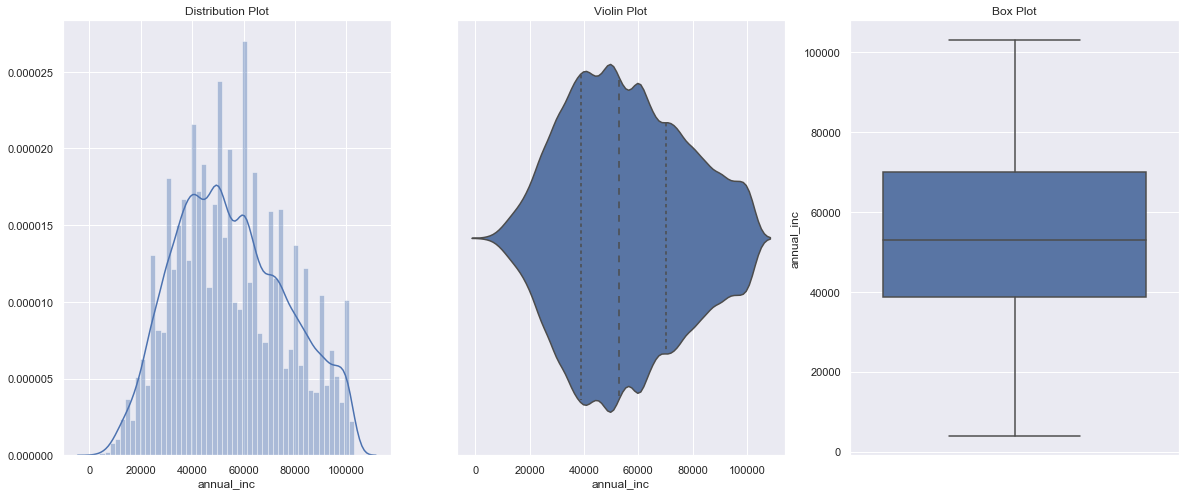

In [30]:
univariate(df=loan_df,col='annual_inc',vartype=0)

In [ ]:
# Categorical Variables

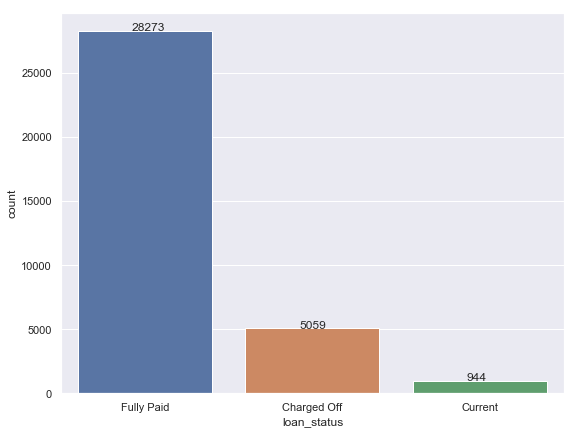

In [31]:
# 4. Loan Status
univariate(df=loan_df,col='loan_status',vartype=1)


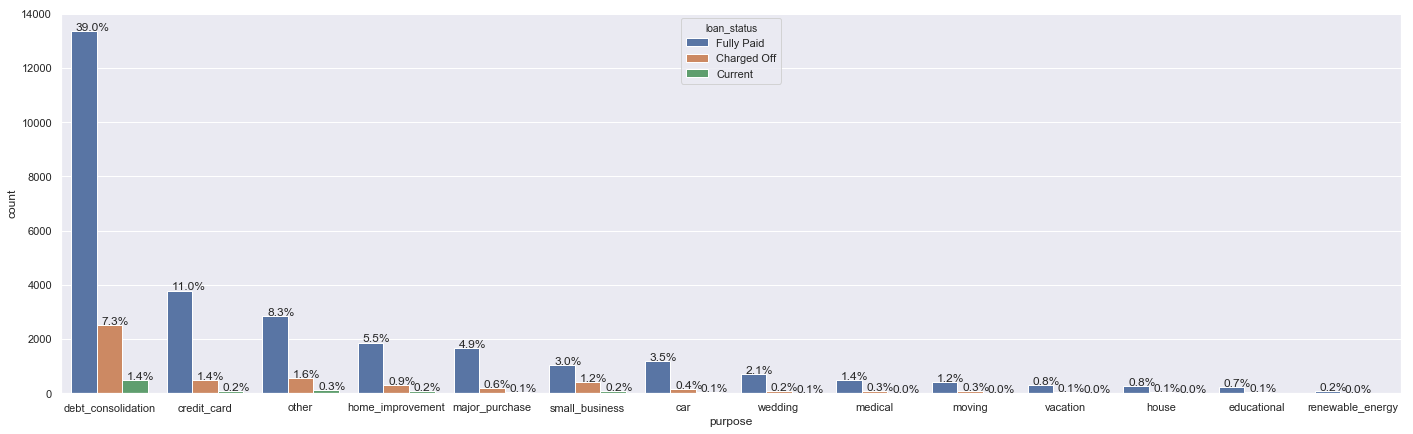

In [32]:
# 5. Purpose of loan

univariate(df=loan_df,col='purpose',vartype=1,hue='loan_status')

In [206]:
# 6. Home Ownership wise Loan
loan_df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [33]:
# Remove rows where home_ownership'=='OTHER', 'NONE', 'ANY'
rem = ['OTHER', 'NONE', 'ANY']
loan_df.drop(loan_df[loan_df['home_ownership'].isin(rem)].index,inplace=True)
loan_df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

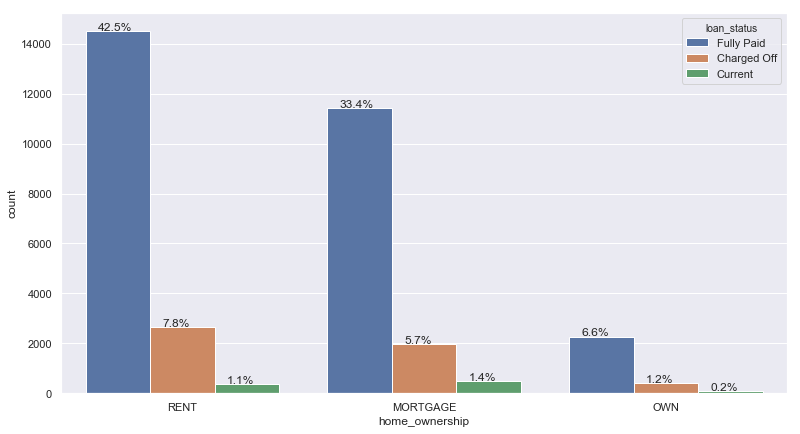

In [34]:
univariate(df=loan_df,col='home_ownership',vartype=1,hue='loan_status')

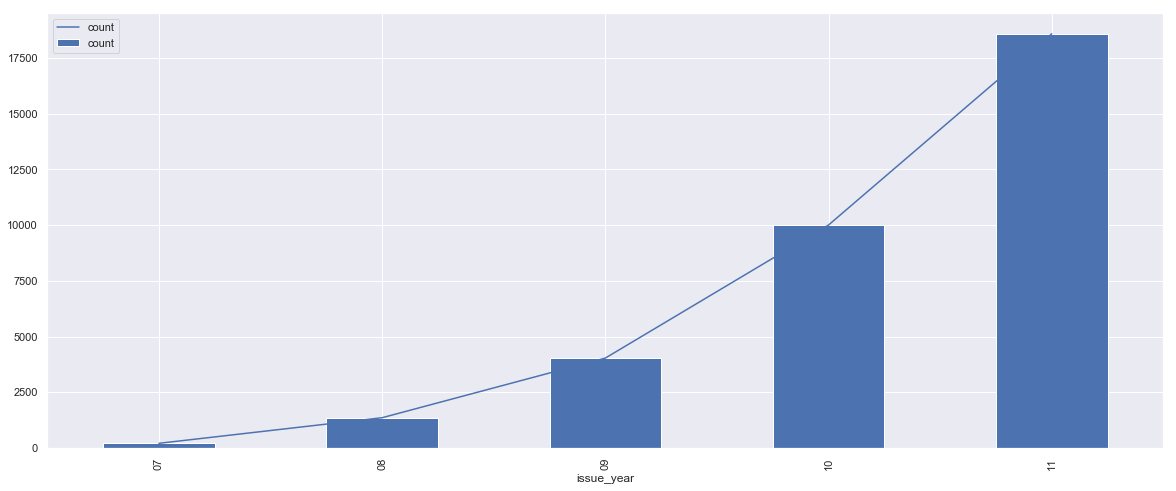

In [35]:
# 7. Year wise Loan
year_wise =loan_df.groupby(by= [loan_df.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

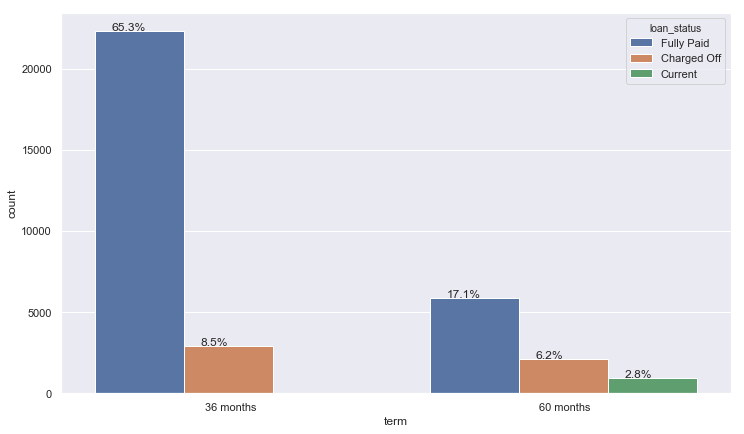

In [36]:
# 8. Loan Term

univariate(df=loan_df,col='term',vartype=1,hue='loan_status')

In [37]:
loan_df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,loan_income_ratio,issue_month,issue_year,loan_amnt_range,int_rate_range,annual_inc_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860,AZ,27.65,0,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,171.62,0.0,0.208333,Dec,11,0-5000,10-12.5,20000-40000
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309,GA,1.00,0,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,119.66,0.0,0.083333,Dec,11,0-5000,15 and above,20000-40000
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606,IL,8.72,0,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,649.91,0.0,0.195886,Dec,11,0-5000,15 and above,0-20000


In [ ]:
# Bivariate/Multivariate Analysis

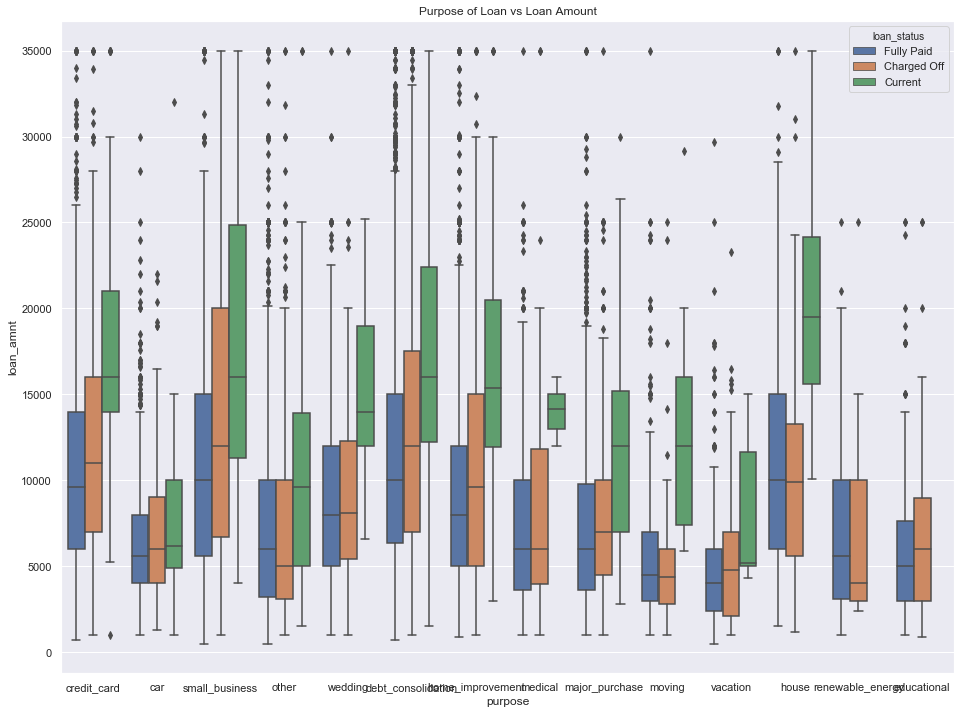

In [38]:
# 1.Purpose of Loan vs Loan Amount for each Loan Status

plt.figure(figsize=(16,12))
sns.boxplot(data =loan_df, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

In [40]:
# 2. Correlation Matrix : All Continuos(Numeric) Variables
loan_correlation = loan_df.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,zip_code,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,loan_income_ratio
loan_amnt,1.000000,0.982099,0.938501,0.283189,0.929308,0.389445,-0.003527,0.112345,-0.044390,0.158594,-0.044677,0.316326,0.071495,0.228475,0.194775,0.194575,0.874117,0.840313,0.836366,0.727369,0.025329,0.135497,0.433307,-0.029122,0.734397
funded_amnt,0.982099,1.000000,0.956386,0.289342,0.954255,0.386121,-0.003156,0.112033,-0.043204,0.156656,-0.045310,0.309604,0.075574,0.222702,0.196818,0.196611,0.890211,0.856449,0.853495,0.736092,0.027542,0.137575,0.438384,-0.029983,0.721203
funded_amnt_inv,0.938501,0.956386,1.000000,0.285064,0.900162,0.369711,-0.003568,0.120255,-0.046943,0.145514,-0.047775,0.291970,0.081667,0.217596,0.205852,0.205837,0.868282,0.901287,0.828984,0.729367,0.007694,0.127514,0.431358,-0.031370,0.686562
int_rate,0.283189,0.289342,0.285064,1.000000,0.261667,0.048727,0.013305,0.102677,0.148179,-0.020926,0.103743,0.067609,0.462517,-0.080786,0.125223,0.125407,0.278454,0.275383,0.156531,0.513146,0.083504,0.125054,0.135826,0.086704,0.226968
installment,0.929308,0.954255,0.900162,0.261667,1.000000,0.382911,0.001169,0.098928,-0.031455,0.151247,-0.040095,0.306439,0.104515,0.198210,0.125356,0.125285,0.845174,0.803123,0.835647,0.631998,0.037488,0.119031,0.384657,-0.026226,0.673825
annual_inc,0.389445,0.386121,0.369711,0.048727,0.382911,1.000000,-0.012738,-0.032538,0.024264,0.261414,0.000541,0.357647,0.044592,0.369819,0.055745,0.055524,0.361621,0.348211,0.363829,0.258788,-0.010917,0.029322,0.199456,0.004103,-0.237318
zip_code,-0.003527,-0.003156,-0.003568,0.013305,0.001169,-0.012738,1.000000,0.011695,-0.013786,-0.052753,0.014654,-0.002726,0.035747,-0.033197,-0.009829,-0.009748,-0.008666,-0.008424,-0.009287,-0.004695,-0.016376,-0.000294,0.000363,0.032092,0.004111
dti,0.112345,0.112033,0.120255,0.102677,0.098928,-0.032538,0.011695,1.000000,-0.030451,0.301568,-0.007925,0.294524,0.269539,0.255982,0.044434,0.044296,0.108618,0.115116,0.086858,0.134391,-0.011855,0.028714,0.029979,0.003628,0.120529
delinq_2yrs,-0.044390,-0.043204,-0.046943,0.148179,-0.031455,0.024264,-0.013786,-0.030451,1.000000,0.016125,0.010446,-0.075345,-0.045474,0.070850,-0.008549,-0.008485,-0.035096,-0.039338,-0.048872,0.008334,0.026924,0.011988,-0.017145,0.005250,-0.063045
open_acc,0.158594,0.156656,0.145514,-0.020926,0.151247,0.261414,-0.052753,0.301568,0.016125,1.000000,0.007317,0.279411,-0.107213,0.681846,0.022437,0.022267,0.140571,0.131971,0.141535,0.100300,-0.020022,0.011609,0.072694,0.012071,-0.008407


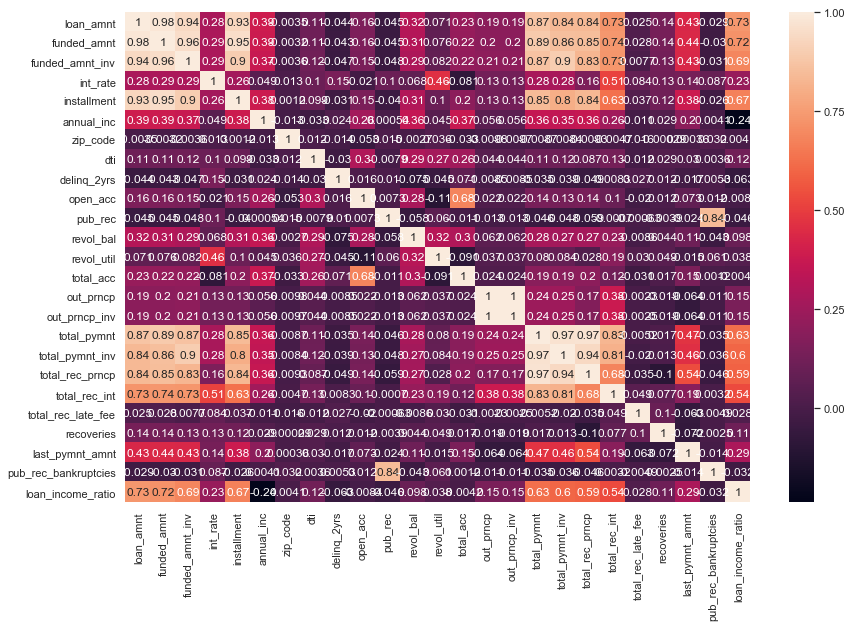

In [41]:
# 3. HeatMap: All continuos variables
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

In [42]:
# 4.Employment Length vs Loan Amount for different pupose of Loan

loanstatus=loan_df.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=loan_df.loc[loan_df['loan_status']=='Charged Off']



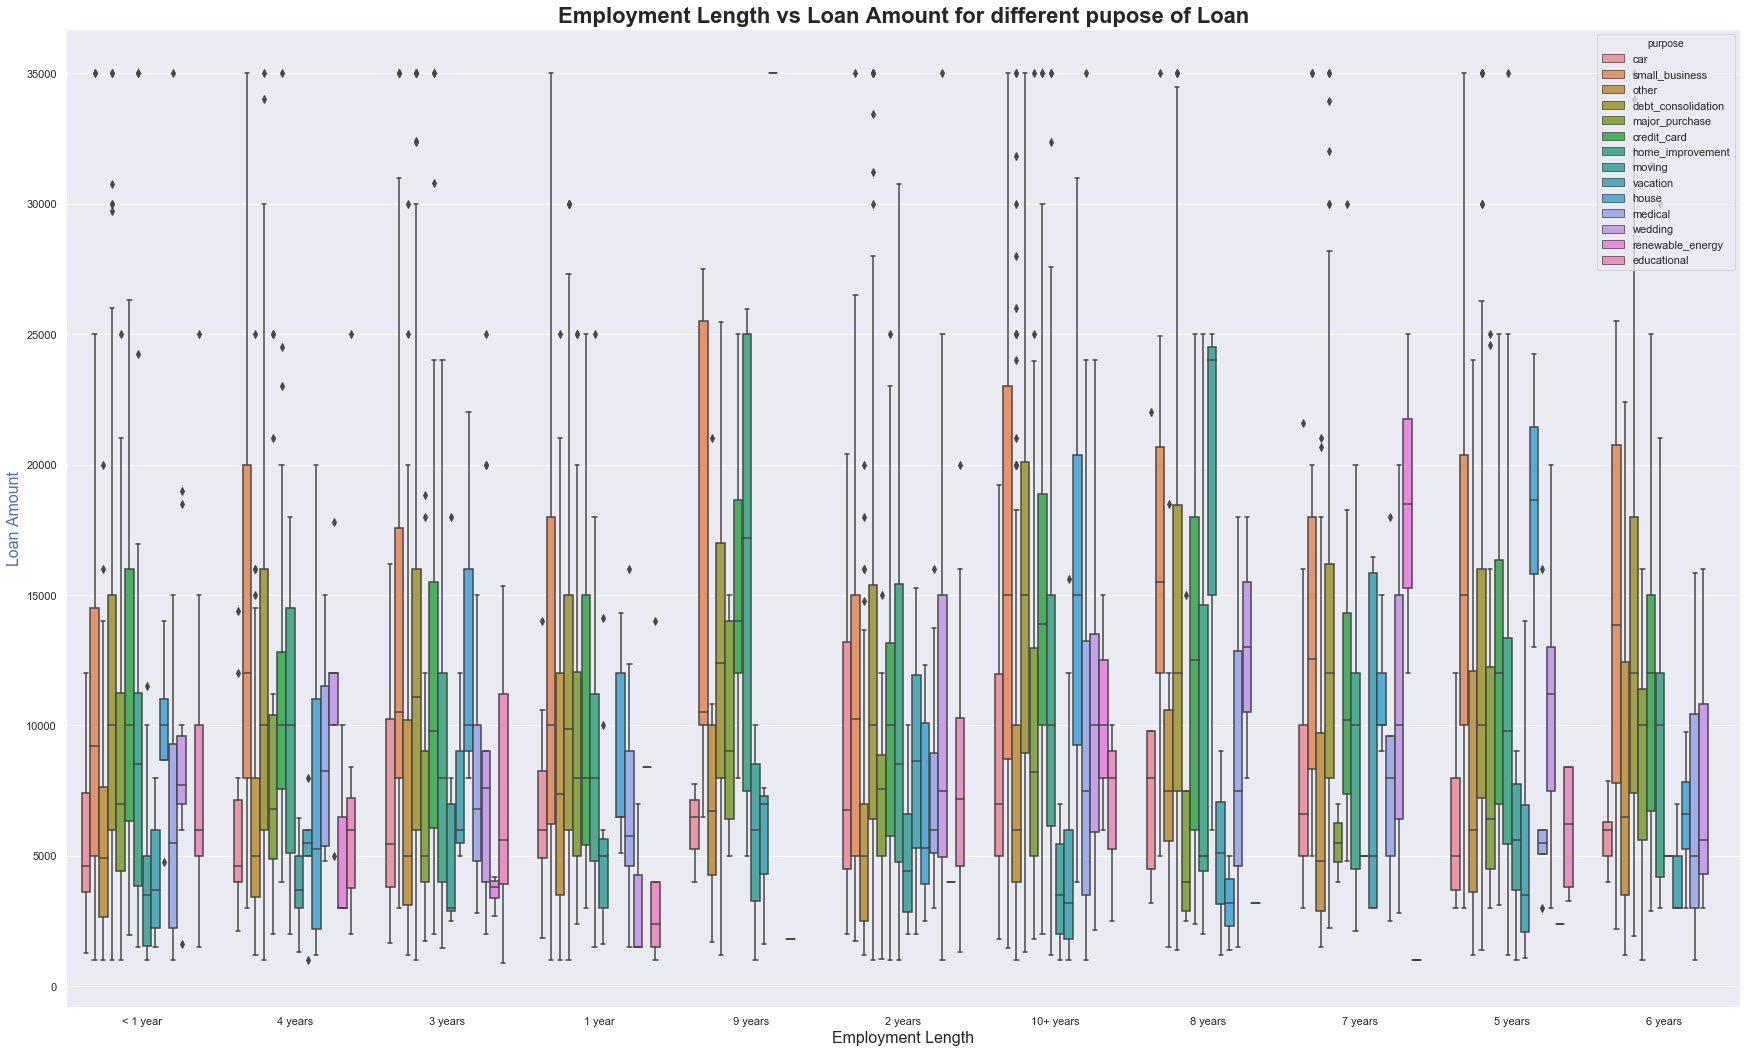

In [43]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

In [44]:
# Bivariate/Multivariate Analysis with Probability of Charge off

def crosstab(df,col):
   
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab


In [45]:
# Probability of charge off
def bivariate_prob(df,col,stacked= True):
   
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

In [46]:
# Location vs Probability Charge Off

filter_states = loan_df.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = loan_df.drop(labels = loan_df[loan_df.addr_state.isin(filter_states.index)].index)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
addr_state,,,,,
NJ,255,47,1241,1543,0.165
NM,30,5,138,173,0.173
NV,96,15,322,433,0.222
NY,438,95,2740,3273,0.134
OH,151,43,919,1113,0.136
OK,38,10,217,265,0.143
OR,65,13,329,407,0.160
PA,168,43,1157,1368,0.123
RI,23,4,149,176,0.131


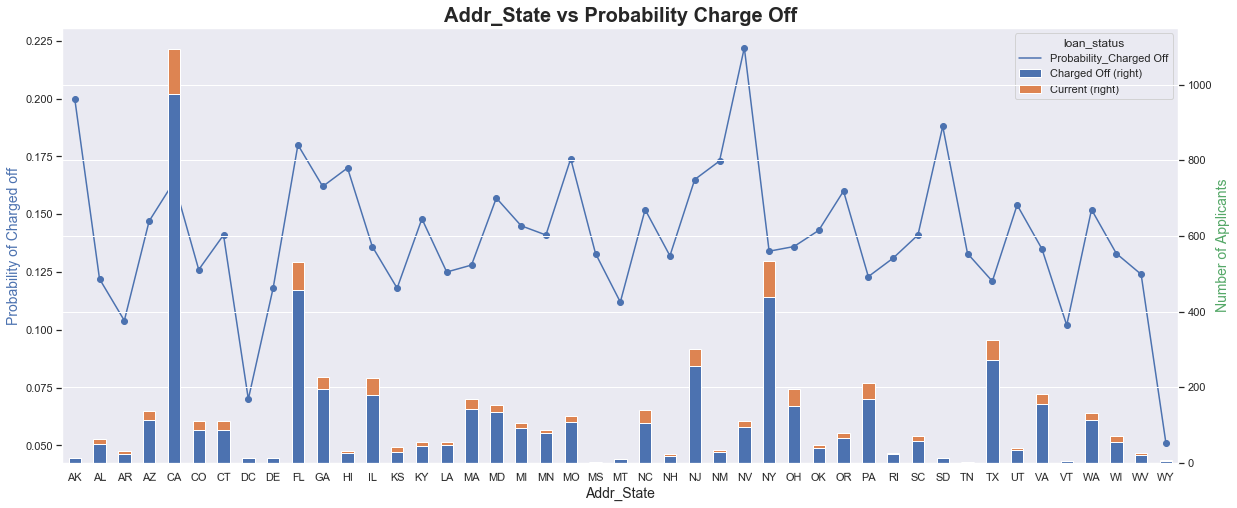

In [47]:
states = crosstab(loan_filter_states,'addr_state')
display(states.tail(20))

bivariate_prob(df =loan_filter_states,col ='addr_state')

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
purpose,,,,,
car,148,48,1186,1382,0.107
credit_card,481,85,3778,4344,0.111
debt_consolidation,2503,489,13336,16328,0.153
educational,51,0,239,290,0.176
home_improvement,293,67,1866,2226,0.132
house,48,11,258,317,0.151
major_purchase,205,34,1675,1914,0.107
medical,98,5,494,597,0.164
moving,86,7,413,506,0.170


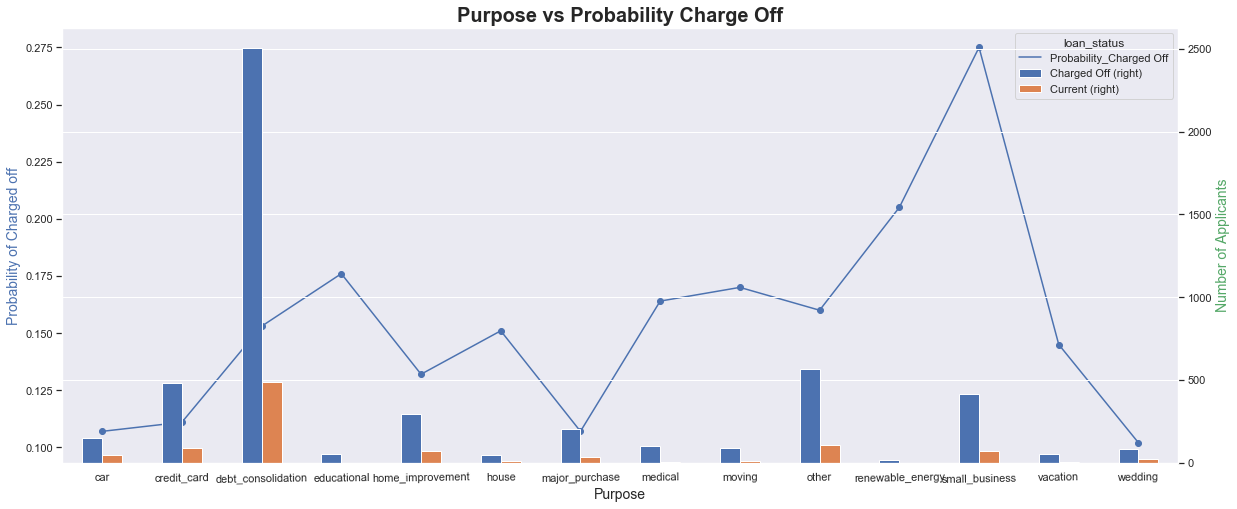

In [48]:
# Purpose of Loan vs Probability Charge Off
purpose = crosstab(loan_df,'purpose')
display(purpose)

bivariate_prob(df =loan_df,col ='purpose',stacked=False)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
grade,,,,,
A,566,37,8204,8807,0.064
B,1306,298,8848,10452,0.125
C,1238,219,5601,7058,0.175
D,996,187,3394,4577,0.218
E,600,142,1539,2281,0.263
F,257,49,494,800,0.321
G,79,12,121,212,0.373


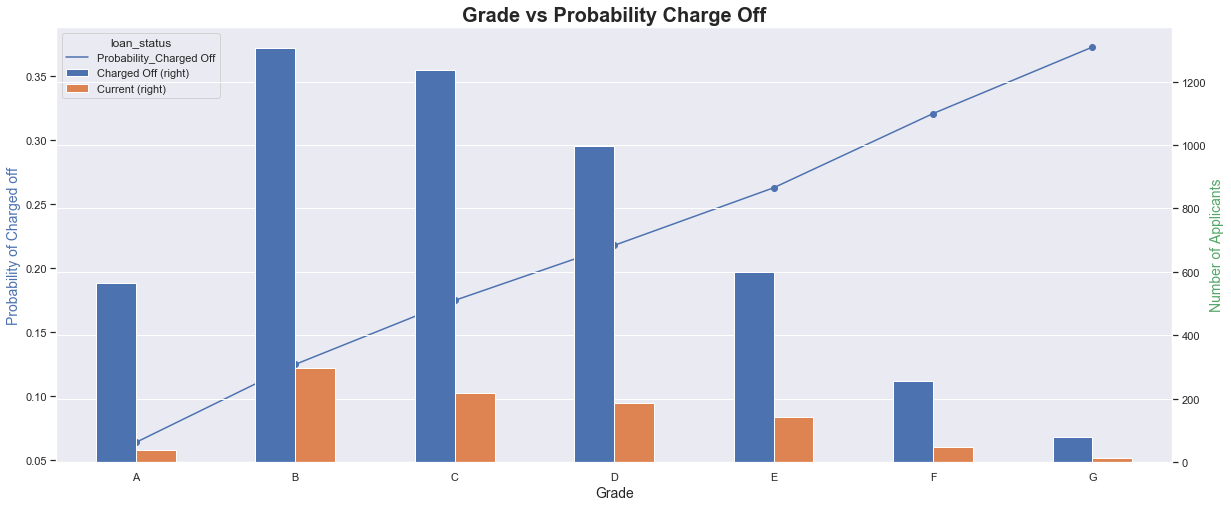

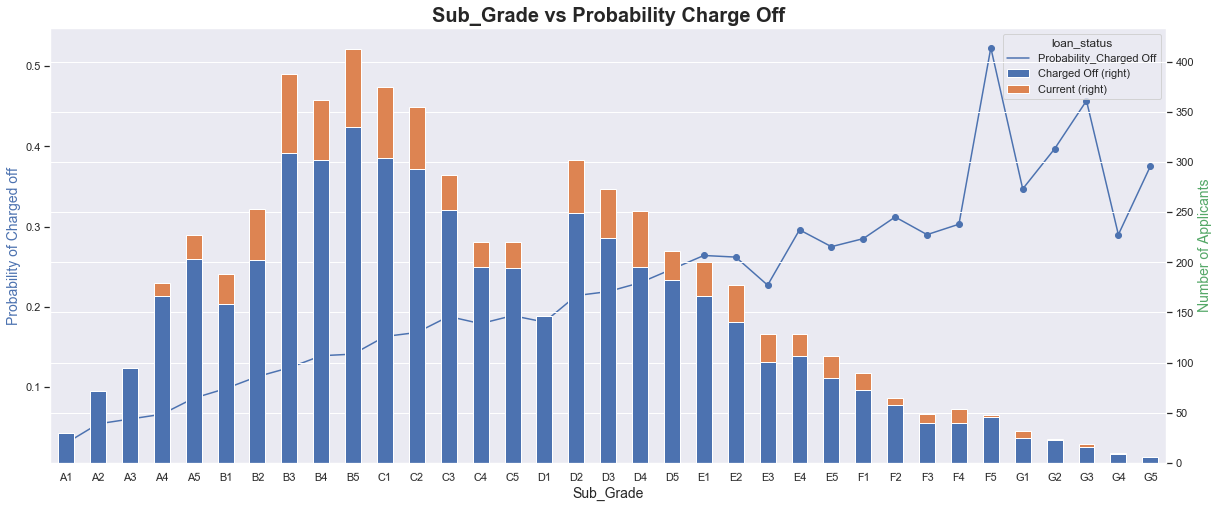

count    34187.000000 
mean     55177.154626 
std      21524.549954 
min      4000.000000  
25%      38790.000000 
50%      53000.000000 
75%      70000.000000 
max      102996.000000
Name: annual_inc, dtype: float64

In [52]:
# Grade/Subgrade vs Probability Charge Off

grade = crosstab(loan_df,'grade')
display(grade)

bivariate_prob(df =loan_df,col ='grade',stacked=False)
bivariate_prob(df =loan_df,col ='sub_grade')
loan_df = loan_df[loan_df["annual_inc"] < q]
loan_df["annual_inc"].describe()

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
annual_inc_range,,,,,
0-20000,237,9,940,8663,0.027
20000-40000,1508,170,6985,1186,1.272
40000-60000,1725,345,9512,11582,0.149
60000-80000,1019,240,6583,7842,0.130
80000-100000,529,170,3969,4668,0.113
100000 and above,24,10,212,246,0.098


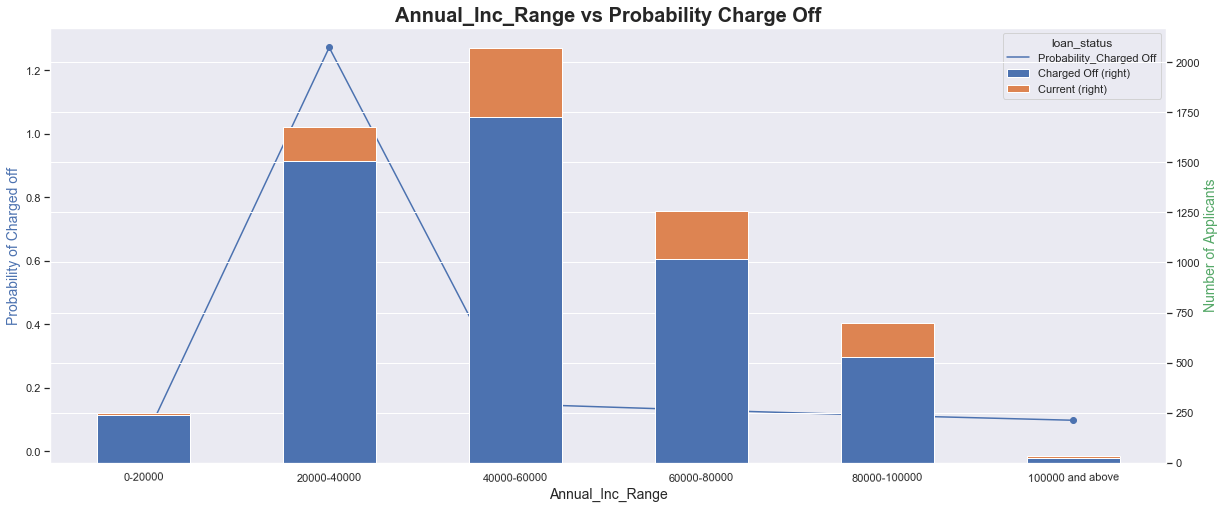

In [53]:
# Annual Income Range vs Probability Charge Off

annual_inc_range = crosstab(loan_df,'annual_inc_range')
display(annual_inc_range)

bivariate_prob(df =loan_df,col ='annual_inc_range')


loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,,
0-7.5,243,7,4467,6402,0.038
7.5-10,530,64,5533,7943,0.067
10-12.5,1134,232,7007,4717,0.240
12.5-15,1336,216,6391,8373,0.160
15 and above,1565,355,4482,6127,0.255


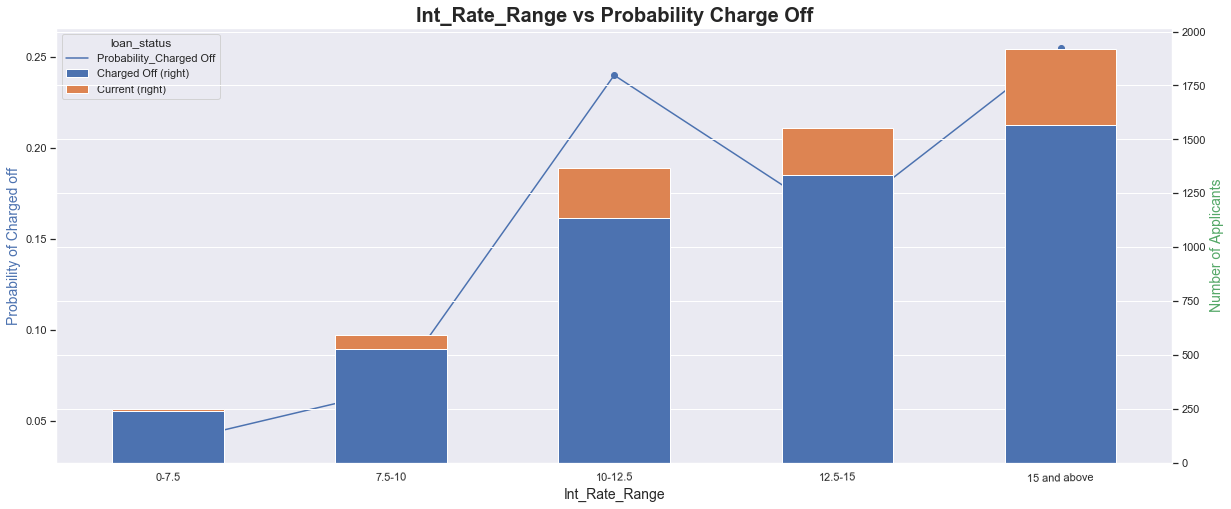

In [54]:
# Interest rate Range vs Probability Charge Off

int_rate_range = crosstab(loan_df,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan_df,col ='int_rate_range')

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
emp_length,,,,,
1 year,419,62,2400,2881,0.145
10+ years,1149,296,5656,7101,0.162
2 years,515,79,3298,3892,0.132
3 years,504,70,2987,3561,0.142
4 years,419,86,2514,3019,0.139
5 years,406,71,2390,2867,0.142
6 years,271,53,1620,1944,0.139
7 years,235,56,1262,1553,0.151
8 years,176,40,1024,1240,0.142


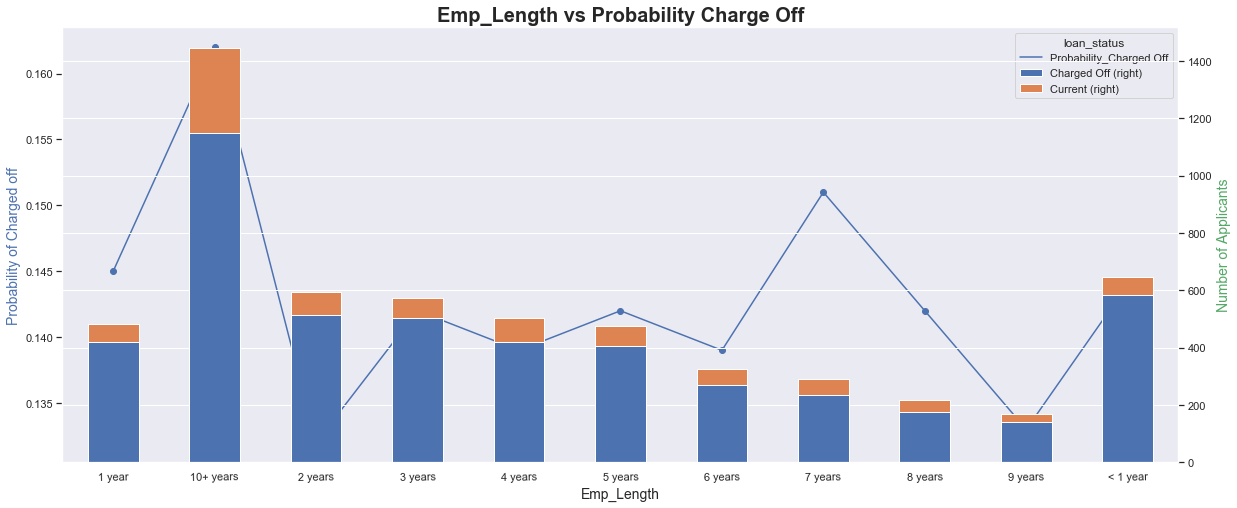

In [55]:
#  Employment Length vs Probability Charge Off
emp_length = crosstab(loan_df,'emp_length')
display(emp_length)
bivariate_prob(df =loan_df,col ='emp_length')